# Lab 4

**Due Date**: 2/14/25 by 8pm on Canvas

## Installing Libraries

Machine learning in Python has a plethora of popularly used libraries. We can install these library packages within the Jupyter Notebooks itself. Just run the cell below and it should download and install them to your computer. You only need to run this cell one time. After the package has been installed, feel free to change the cell type below from "Code" to "Raw" so it doesn't run this again.

In [9]:
import sys
!{'"' + sys.executable + '"'} -m pip install matplotlib
!{'"' + sys.executable + '"'} -m pip install numpy
!{'"' + sys.executable + '"'} -m pip install scikit-learn

<class 'OSError'>: Not available

## Imports

In [1]:
%pip install matplotlib
%pip install numpy
%pip install scikit-learn

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


## Generate and Visualize an Unlabeled Dataset

Let's start by creating a random dataset. Use the `make_blobs` function to make it simple (see [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) for how it works). As always, it's a good idea to visualize our data.

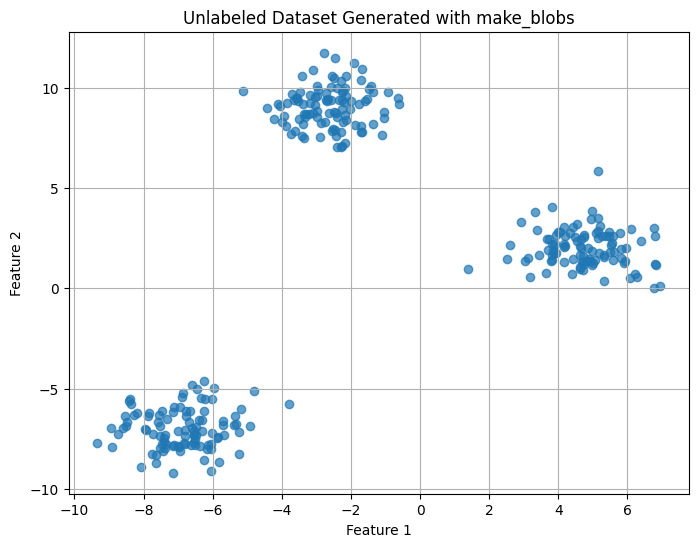

In [5]:
def visualize_data(X, title):
    """Visualizes 2D data

    Args:
        X: A NumPy array of shape (n_samples, 2) representing the feature data.
           Each row corresponds to a data point, and the two columns represent
           the two features.
        title: A string representing the title of the plot.
    """
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], label='Label 1', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.grid(True)

# TODO: use the `make_blobs` function to generate a dataset (ignore the labels)
n_samples = 300
n_features = 2
n_clusters = 3
dataA, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# TODO: call the `visualize_data` function on the dataset
visualize_data(dataA, "Unlabeled Dataset Generated with make_blobs")

## DBSCAN

Check out the [documentation on DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) from the scikit-learn library. Use this to help you create a `DBSCAN` object. Then,  use the `fit_predict` method on the dataset you made earlier. Print out the clusters that `fit_predict` returned.

In [6]:
# TODO: create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# TODO: use `fit_predict` on your dataset
clusters = dbscan.fit_predict(dataA)

# TODO: display the clusters
print("Cluster labels:", clusters)

Cluster labels: [ 0  0  2  1 -1  1  2  1  2  2 -1  1  2  2  0  2  0 -1  2 -1  2  2  1  0
  2  3  0 -1  1  2  2  2  0  2 -1  2  0  1  0  1  1  2  0  1  2  2  0  1
  0 -1  1 -1  0 -1  0 -1  0  2  1  2  0 -1  1 -1  0  1  1  0  0  2  1 -1
  0  2  2  0  0  1  2  1  2  2  0  2  1  0  0 -1 -1  4  0  2  0  2  2  0
  0  2  0  3  1  2  1  2  2  2  2  2 -1  0 -1  2  2  2  2  1  0 -1  0 -1
  1  1 -1  0  0  0  0  2  0  0  2  2  2 -1 -1  1  1  0  2  0  2  2 -1  2
  1  1  1  2  1  2  4  0  1 -1  2  1  1  0 -1  2 -1  0  0  0  2  0  1 -1
  2  2  2 -1  1  2  1  1  1 -1 -1  1  0  2  0 -1  1 -1  1 -1 -1  1  0 -1
  1  0  1 -1  1 -1  2  0  2  2  1  1  2  1  0  0  1  2  2  0  1 -1  0  0
  3  0  4 -1 -1 -1  0  0  2  1  0  0  1  2 -1 -1  2 -1  1  1  0  1  0  0
  3  1  1  2  0  1  1  1  0  1  0  1  0 -1 -1  0  1  2 -1  2  2  2  0  2
  1  1  0  1  1  2  2  1  1  1  0  0  0  4 -1  4  1  1 -1 -1  0  1 -1  1
  1  0  2  1  1  2  0  2  1  2  3 -1]


## With Scaling

One important aspect of DBSCAN (and really, many ML algorithms) is scaling the dataset. A simply transformation we can use for this is called `StandardScaler`. Research [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on how to use this and apply it to your dataset. Display the clusters again and also visualize the dataset.

Cluster labels after scaling: [0 0 1 2 0 2 1 2 1 1 1 2 1 1 0 1 0 2 1 1 1 1 2 0 1 0 0 2 2 1 1 1 0 1 0 1 0
 2 0 2 2 1 0 2 1 1 0 2 0 2 2 0 0 1 0 2 0 1 2 1 0 2 2 0 0 2 2 0 0 1 2 0 0 1
 1 0 0 2 1 2 1 1 0 1 2 0 0 1 2 1 0 1 0 1 1 0 0 1 0 0 2 1 2 1 1 1 1 1 2 0 2
 1 1 1 1 2 0 2 0 2 2 2 1 0 0 0 0 1 0 0 1 1 1 1 1 2 2 0 1 0 1 1 0 1 2 2 2 1
 2 1 1 0 2 0 1 2 2 0 0 1 1 0 0 0 1 0 2 1 1 1 1 1 2 1 2 2 2 1 2 2 0 1 0 2 2
 0 2 1 2 2 0 0 2 0 2 2 2 2 1 0 1 1 2 2 1 2 0 0 2 1 1 0 2 2 0 0 0 0 1 0 0 2
 0 0 1 2 0 0 2 1 1 0 1 0 2 2 0 2 0 0 0 2 2 1 0 2 2 2 0 2 0 2 0 2 2 0 2 1 0
 1 1 1 0 1 2 2 0 2 2 1 1 2 2 2 0 0 0 1 1 1 2 2 2 2 0 2 0 2 2 0 1 2 2 1 0 1
 2 1 0 0]


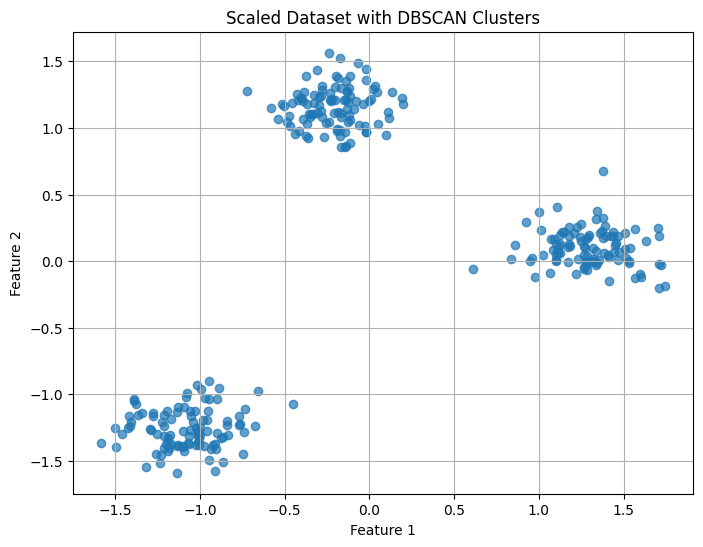

In [7]:
# TODO: scale your dataset
scaler = StandardScaler()
dataA_scaled = scaler.fit_transform(dataA)

# TODO: use `fit_predict` with DBSCAN on the scaled dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_scaled = dbscan.fit_predict(dataA_scaled)

# TODO: display the new clusters
print("Cluster labels after scaling:", clusters_scaled)

# TODO: visualize the scaled dataset by calling the `visualize_data` function
visualize_data(dataA_scaled, "Scaled Dataset with DBSCAN Clusters")

## Visualize DBSCAN Configurations

Let's explore how the minimum samples $m$ and distance threshold $\epsilon$ can affect the DBSCAN algorithm. In the code below, you will need to create a `DBSCAN` object for the current configuration and then use the `fit_predict` method on it to return the clusters it found. The rest of the code will visualize the various model configurations. Feel free to experiment with other values by adjusting the `eps_values` and `min_samples_values` lists.

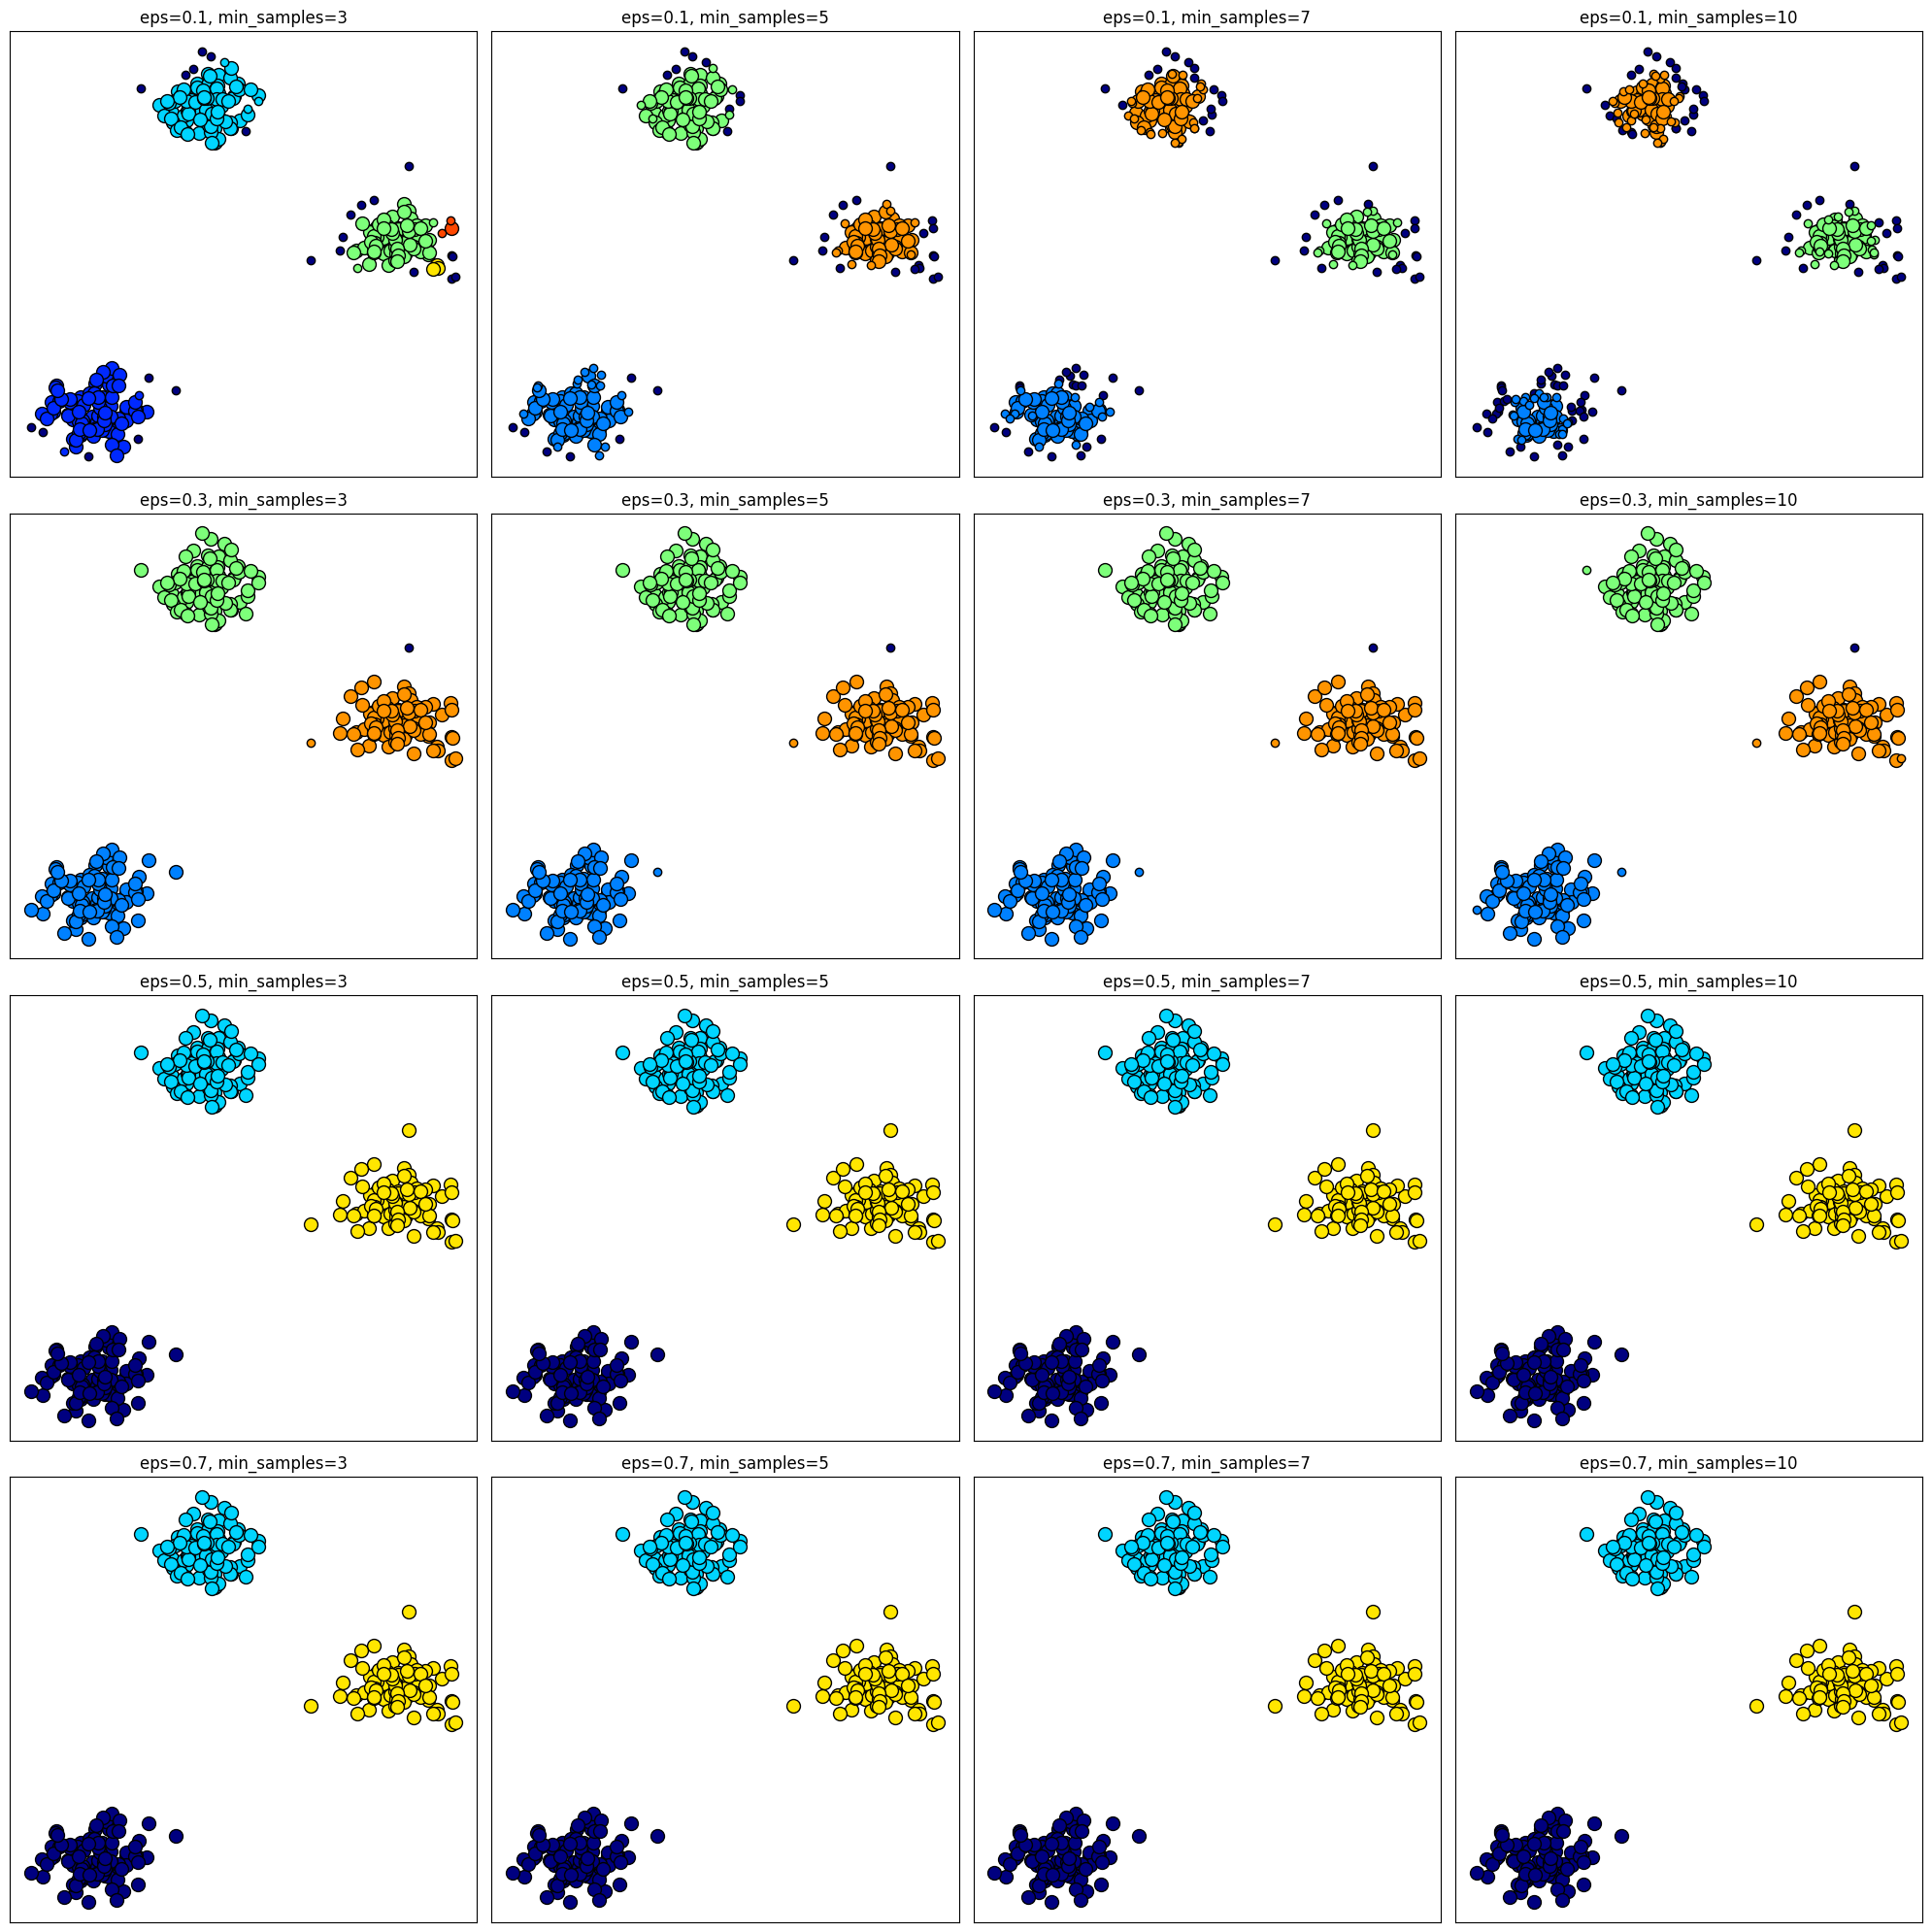

In [10]:
eps_values = [0.1, 0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7, 10]

n_rows = len(eps_values)
n_cols = len(min_samples_values)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # TODO: create a DBSCAN object for the current configuration (`eps` and `min_samples`)
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # TODO: use the `fit_predict` method on your dataset to get the clusters it found
        # (call this variable `labels`)
        labels = dbscan.fit_predict(dataA_scaled)

        # Get the core samples (important for visualization)
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True

        # Plotting
        if n_rows == 1 and n_cols == 1:
            ax = axes
        elif n_rows == 1:
            ax = axes[j]
        elif n_cols == 1:
            ax = axes[i]
        else:
            ax = axes[i, j]

        # Plot core samples in black, others by cluster label
        unique_labels = np.unique(labels)
        colors = [plt.cm.jet(i / len(unique_labels)) for i in range(len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1: # Noise points
                cluster_member_mask = (labels == k)
                ax.plot(dataA[cluster_member_mask, 0], dataA[cluster_member_mask, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
            else: # Core and border points of clusters
                class_member_mask = (labels == k)
                xy = dataA[class_member_mask & core_samples_mask]
                ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10) # Larger for core points
                xy = dataA[class_member_mask & ~core_samples_mask]
                ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6) # Smaller for border points

        ax.set_title(f"eps={eps}, min_samples={min_samples}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()

## Fit to the Moon

Finally, let's see if you are able to use DBSCAN to find clusters on a complex shape: the classic moons 🌜🌛. You will need to find the correct configuration of $\epsilon$ and $m$ with DBSCAN to get the clusters correctly.

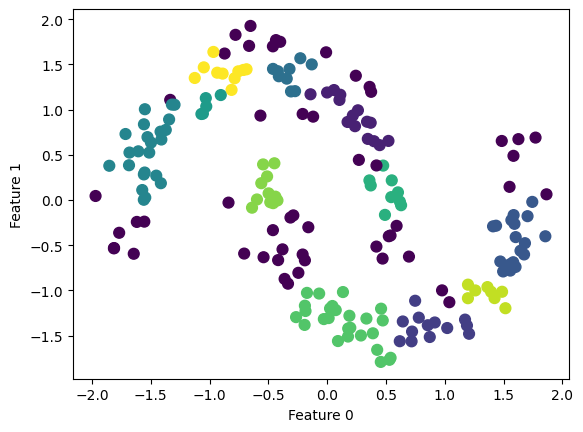

In [11]:
X_moon, y_moon = make_moons(n_samples=200, noise=0.1, random_state=42)

# rescale the data to zero mean and unit variance
moon_scaler = StandardScaler()
moon_scaler.fit(X_moon)
X_moon_scaled = moon_scaler.transform(X_moon)

# TODO: create a DBSCAN model with a specific configuration
dbscan_moon = DBSCAN(eps=0.2, min_samples=5)

# TODO: call the `fit_predict` method on the `X_moon_scaled` dataset
# (call this variable `moon_clusters`)
moon_clusters = dbscan_moon.fit_predict(X_moon_scaled)

# plot the cluster assignments
plt.scatter(X_moon_scaled[:, 0], X_moon_scaled[:, 1], c=moon_clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()